## Assignment 5: Visualization

**Name: Monica Flores NetID: mf3435**

The goal of the assignment is to get more familiar with producing graph in Python following the examples we saw in class. Please generate a graphical representation of your choice using data that you have already been exploring in your group project work. 

You may want to discuss with your group what kind of graph you would like to include your final presentation and use this exercise to prepare the graph. This way each of the group members can produce a different graph that you will be using later on. 

This is a individual exercise, but as always feel free to discuss in your group and come to us with any questions you have. However, please make sure that not all group members will be submitting the same graph. 

You should be following the steps for producing graphs that we talked about in class:
1. **Prepare your data:** This includes loading the data you are using into a dataframe and generate a dataframe that holds the information you need to produce the graph. For example, if you are plotting averages of your variable by interest you first have to calculate that average. 
2. **Create the plot:** This includes making a decision what kind of plot to create, setting up the code, and the schema, plotting the actual plot and then customize it. Customizing should include adjusting, margins, title, lables, tickmarks, grids, color, fontsize, legend, annotation etc. Anything that makes the plot easier to read and interesting for the reader. You want to revisit the slide from the lecture on how to design nice graphs. The graph should be in a format that you can directly include it into your presentation without making any further adjustments.
3. **Save and show plot:** Save the graph as pdf or png file and upload this file together with your notebook to NYU classes. Make sure that your code is executable. Will will deduct points if the code does not produce the graph uploaded to NYU classes. 

Submission deadline is April 19th, 11:55pm.

### Load Packages

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mplib
import matplotlib.pyplot as plt # visualization package 1
import seaborn as sns           # visualization package 2

# database connections
import sqlalchemy
from sqlalchemy import create_engine

# so images get plotted in the notebook
%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/Wagner/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Prepare the Data

In [8]:
#Import NYC Census Block level data on racial composition of the population
#Import Block ID as character to preserve full number
blocks = pd.read_csv("/nfshome/mf3435/projects/ada_pub_1/shared/Data/blocks_clean.csv", usecols=range(1,23), dtype= {'BLOCKID': str})
blocks.shape
#28,376 observations, 22 variables

(28376, 22)

In [10]:
# See what is available (notice we have some whitespaces here)
blocks.count()
#28376 blocks in total with 643 if them belonging to BIDs

BLOCKID         28376
Pop10           28376
Pop00           28376
shWhite00       28376
shLatino00      28376
shBlack00       28376
shAsian00       28376
shOther00       28376
pct_ch_white    28376
pct_ch_hisp     28376
pct_ch_black    28376
pct_ch_asian    28376
pct_ch_other    28376
pop_pct_ch      28376
BoroName        28376
NTACode         28376
NTAName         28376
A_poly          28376
bid_id            643
bid_name          643
a_weight        28376
BID_dummy       28376
dtype: int64

In [41]:
# Add BID string variable from BID dummy
blocks['BID_str'] = np.where(blocks.BID_dummy ==1, 'BID',
                           np.where(blocks.BID_dummy == 0,'Non-BID', ''))

blocks.head()

,BLOCKID,Pop10,Pop00,shWhite00,shLatino00,shBlack00,shAsian00,shOther00,pct_ch_white,pct_ch_hisp,...,pop_pct_ch,BoroName,NTACode,NTAName,A_poly,bid_id,bid_name,a_weight,BID_dummy,BID_str
0,360050300004003,249,272.0,58.088235,37.132353,1.102941,2.941176,0.735294,-17.525986,9.453992,...,91.544118,Bronx,BX10,Pelham Bay-Country Club-City Island,173964,NaN,NaN,1.0,0,Non-BID
1,360050409001001,11,1119.0,1.340483,9.562109,86.058981,0.983021,2.055407,-1.340483,-9.562109,...,0.983021,Bronx,BX43,Norwood,1387986,NaN,NaN,1.0,0,Non-BID
2,360050409002000,3223,1886.0,26.988335,9.809120,59.172853,1.855779,2.173913,-12.498729,1.422652,...,170.890774,Bronx,BX05,Bedford Park-Fordham North,833865,NaN,NaN,1.0,0,Non-BID
3,360050419001004,225,233.0,19.313305,60.944206,6.437768,11.587983,1.716738,-5.535527,-8.944206,...,96.566524,Bronx,BX43,Norwood,48578,NaN,NaN,1.0,0,Non-BID
4,360050449011006,28,28.0,71.428571,28.571429,0.000000,0.000000,0.000000,-3.571429,-7.142857,...,100.000000,Bronx,BX62,Woodlawn-Wakefield,49237,NaN,NaN,1.0,0,Non-BID


In [11]:
## Check the distribution of variable of interest (Change in Percentage of White Population)
print(blocks.pct_ch_white.describe())
## Median change in share of white population -1.71%

count    28376.000000
mean        -3.670099
std         12.613969
min        -98.405823
25%         -9.166667
50%         -1.711457
75%          1.360371
max         98.420221
Name: pct_ch_white, dtype: float64


In [12]:
## Let's take a look at the BIDs only
BIDs = blocks[blocks["BID_dummy"] == 1]
print(BIDs.pct_ch_white.describe())
## Median change in share of white population 0.24%

count    643.000000
mean       1.851980
std       14.002667
min      -50.866142
25%       -5.330852
50%        0.236935
75%        6.957894
max       85.714286
Name: pct_ch_white, dtype: float64


In [43]:
## Let's take a look at the non BIDs only
BIDs = blocks[blocks["BID_dummy"] == 0]
print(BIDs.pct_ch_white.describe())
## Median change in share of white population -1.76%

count    27733.000000
mean        -3.798130
std         12.551448
min        -98.405823
25%         -9.259259
50%         -1.759486
75%          1.282051
max         98.420221
Name: pct_ch_white, dtype: float64


In [33]:
## Calculate median change in pct of white population by borough
# All observations:
med_boro_all = blocks.groupby('BoroName')['pct_ch_white'].mean().reset_index()
med_boro_all.columns = ['BoroName','pct_ch_white']

## Print the result
print(med_boro_all)

        BoroName  pct_ch_white
0          Bronx     -4.787835
1       Brooklyn      0.053322
2      Manhattan      1.430489
3         Queens     -6.045372
4  Staten Island     -6.186768


### Explore Graphs: Histograms and Bar Charts

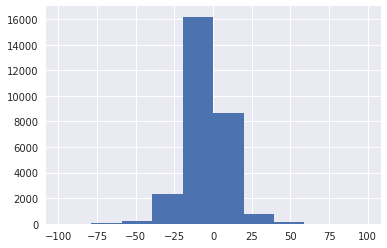

In [37]:
#Print a Histogram of change in racial composition
plt.hist(blocks.pct_ch_white)
plt.show()

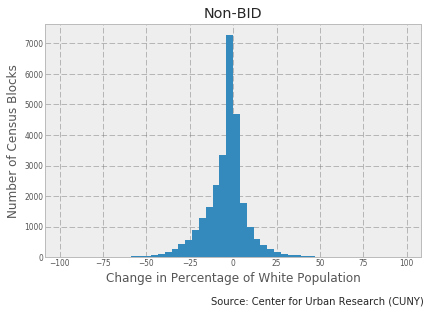

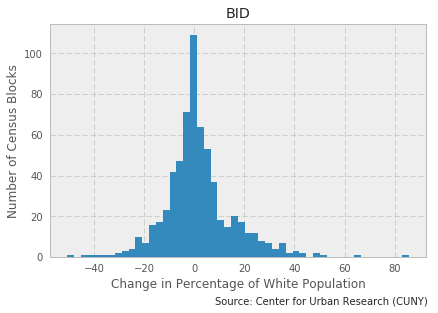

In [114]:
## Set Style
## Set the Background color (https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)
plt.style.use('bmh')
## Change axis and grid
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.xticks(fontsize=7.5)
plt.tick_params(axis='x', which='major', pad=2)
plt.yticks(fontsize=7.5)
plt.tick_params(axis='y', which='major', pad=2)

## Create one chart for BIDs and one for non-BIDs
for i in set(blocks["BID_str"]):
    tmp = blocks[blocks["BID_str"] == i]
    plt.hist(tmp["pct_ch_white"],bins=50)

    plt.xlabel('Change in Percentage of White Population')
    plt.ylabel('Number of Census Blocks')
    plt.title(str(i))
    
    plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.44,-0.2), xycoords="axes fraction")

    filename = "/nfshome/mf3435/Graphics/" + "histogram_" + str(i) + ".pdf"
    
    plt.savefig(filename ,bbox_inches='tight', dpi=200)
    plt.show()

### Explore Graphs: Scatterplot 
* Change in Percentage of White population 2000-2010 and Racial composition in 2000.

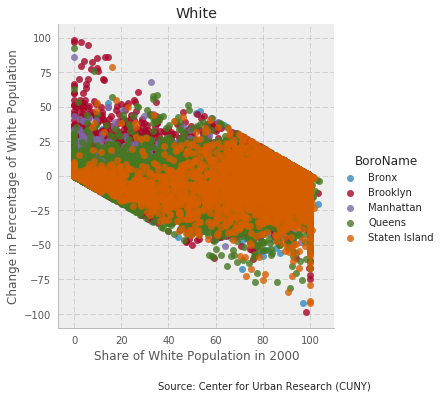

In [111]:
# Percentage of White Population in 2000.
sns.lmplot(x='shWhite00', y='pct_ch_white', data=blocks,
           fit_reg=False, # No regression line
           hue='BoroName')      # Color by Borough

plt.ylabel('Change in Percentage of White Population')
plt.xlabel('Share of White Population in 2000')
plt.title('White')

plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.36,-0.2), xycoords="axes fraction")

plt.savefig("/nfshome/mf3435/Graphics/1_scatter_White.pdf",bbox_inches='tight', dpi=200)

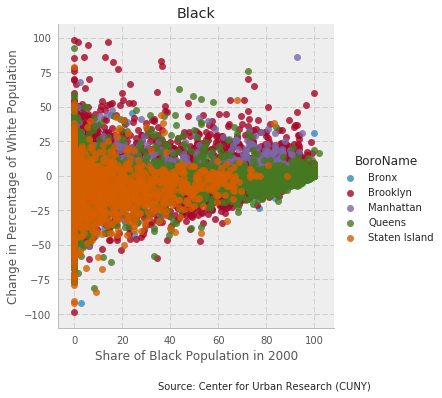

In [103]:
# Percentage of Black Population in 2000.
sns.lmplot(x='shBlack00', y='pct_ch_white', data=blocks,
           fit_reg=False, # No regression line
           hue='BoroName')      # Color by Borough

plt.ylabel('Change in Percentage of White Population')
plt.xlabel('Share of Black Population in 2000')
plt.title('Black')

plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.36,-0.2), xycoords="axes fraction")

plt.savefig("/nfshome/mf3435/Graphics/2_scatter_Black.pdf",bbox_inches='tight', dpi=200)

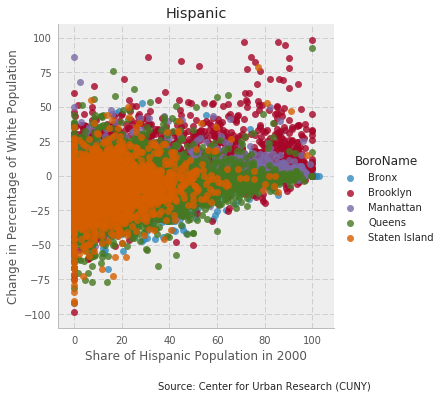

In [102]:
# Percentage of Hispanic Population in 2000.
sns.lmplot(x='shLatino00', y='pct_ch_white', data=blocks,
           fit_reg=False, # No regression line
           hue='BoroName')      # Color by Borough

plt.ylabel('Change in Percentage of White Population')
plt.xlabel('Share of Hispanic Population in 2000')
plt.title('Hispanic')

plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.36,-0.2), xycoords="axes fraction")

plt.savefig("/nfshome/mf3435/Graphics/3_scatter_Hispanic.pdf",bbox_inches='tight', dpi=200)

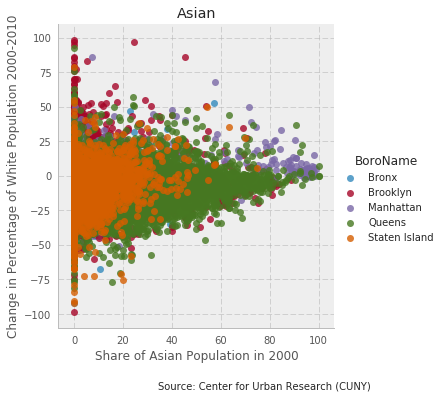

In [101]:
# Percentage of Asian Population in 2000.
sns.lmplot(x='shAsian00', y='pct_ch_white', data=blocks,
           fit_reg=False, # No regression line
           hue='BoroName')      # Color by evolution stage

plt.ylabel('Change in Percentage of White Population 2000-2010')
plt.xlabel('Share of Asian Population in 2000')
plt.title('Asian')

plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.36,-0.2), xycoords="axes fraction")

plt.savefig("/nfshome/mf3435/Graphics/4_scatter_Asian.pdf",bbox_inches='tight', dpi=200)